In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


## Task 1

In [16]:
df['Sub-Category'].value_counts().sort_values(ascending=False).head(4)

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

filtered_df_last_2_years = df[df['Order Date'].dt.year.isin([2017, 2018])]

filtered_df_last_2_years['Sub-Category'].value_counts().sort_values(ascending=False).head(4)

Sub-Category
Binders        900
Paper          809
Furnishings    557
Phones         510
Name: count, dtype: int64

In [23]:
# Фильтрация строк по годам 2017 и 2018
filtered_df_last_year = df[df['Order Date'].dt.year.isin([2018])]

# Подсчет частоты встречаемости значений в 'Sub-Category', сортировка по убыванию и выбор первых 4
filtered_df_last_year['Sub-Category'].value_counts().sort_values(ascending=False).head(4)

Sub-Category
Binders        492
Paper          452
Furnishings    310
Phones         290
Name: count, dtype: int64

## Task 2

In [24]:
# Преобразование 'Sales' в числовой формат
df['Sales'] = df['Sales'].str.replace('.', '', regex=False)  # Удаление точек, если есть
df['Sales'] = df['Sales'].str.replace(',', '.', regex=False)  # Замена запятых на точки
df['Sales'] = pd.to_numeric(df['Sales'])
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


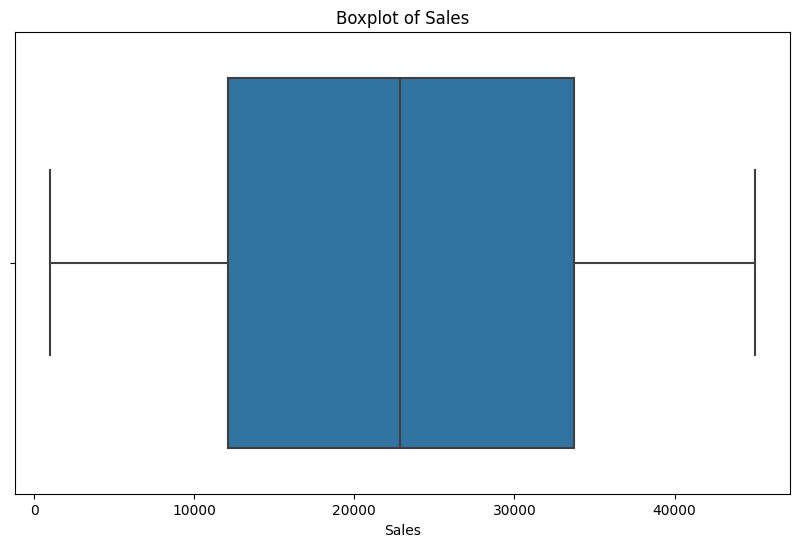

In [30]:
# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()

In [31]:
# Вычисление статистики
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()

# Определение границ для нормального распределения
lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 3 * std_sales

# Удаление выбросов
df_filtered = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

In [32]:
df_filtered

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


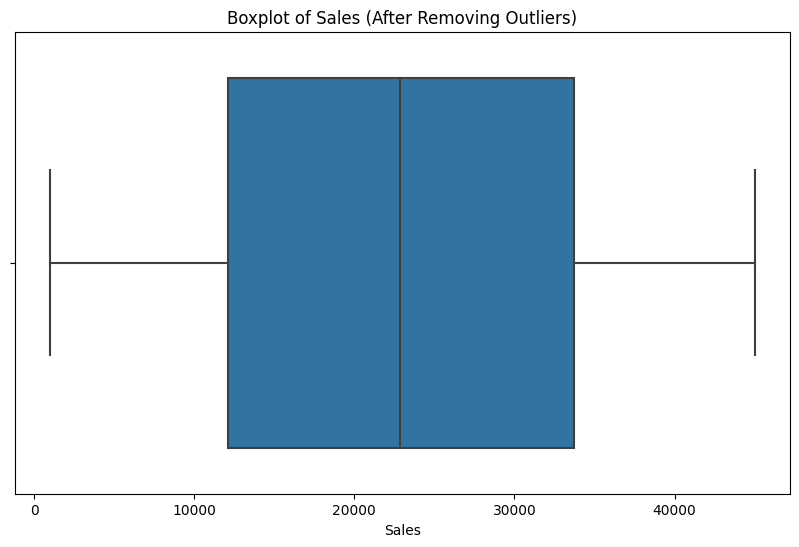

In [33]:
# Построение boxplot после удаления выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Sales'])
plt.title('Boxplot of Sales (After Removing Outliers)')
plt.xlabel('Sales')
plt.show()

## Task 3

In [34]:
bins = [0, 15000, 30000, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Sale_group'] = pd.cut(df['Sales'], bins=bins, labels=labels)

In [35]:
grouped_df = df.groupby(['Region', 'Sale_group'])['Sales'].sum().reset_index()
grouped_df

,Region,Sale_group,Sales
0,Владивосток,Low,7.156561e+06
1,Владивосток,Medium,2.074352e+07
2,Владивосток,High,3.605261e+07
3,Калиниград,Low,8.184268e+06
4,Калиниград,Medium,2.563134e+07
5,Калиниград,High,3.811470e+07
6,Москва,Low,4.011830e+06
7,Москва,Medium,1.241028e+07
8,Москва,High,2.046954e+07
9,Урал,Low,5.868462e+06


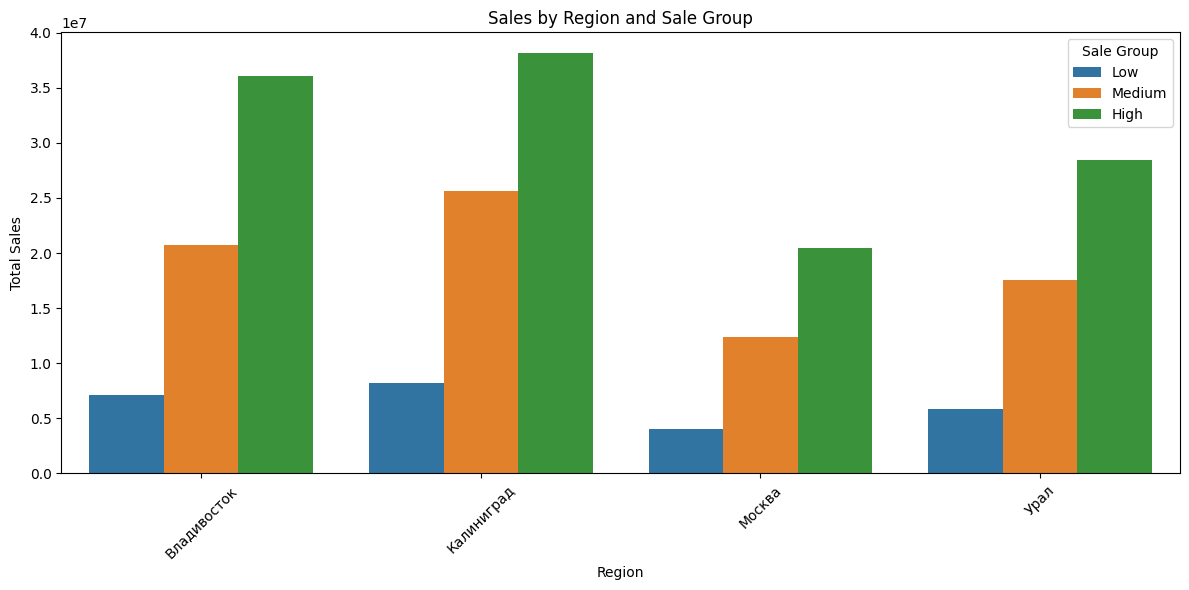

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', hue='Sale_group', data=grouped_df)
plt.title('Sales by Region and Sale Group')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Sale Group')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [37]:
total_sales_by_group = grouped_df.groupby('Sale_group')['Sales'].sum()
most_profitable_group = total_sales_by_group.idxmax()
most_profitable_group

'High'

In [38]:
most_profitable = grouped_df[grouped_df['Sale_group'] == most_profitable_group]
most_profitable

,Region,Sale_group,Sales
2,Владивосток,High,36052609.12
5,Калиниград,High,38114696.00
8,Москва,High,20469544.35
11,Урал,High,28438697.92
